In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
data = pd.read_csv("cost_revenue_dirty.csv")


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Rank                   5391 non-null   int64 
 1   Release_Date           5391 non-null   object
 2   Movie_Title            5391 non-null   object
 3   USD_Production_Budget  5391 non-null   object
 4   USD_Worldwide_Gross    5391 non-null   object
 5   USD_Domestic_Gross     5391 non-null   object
dtypes: int64(1), object(5)
memory usage: 252.8+ KB


In [18]:
data.isnull().sum()

Rank                     0
Release_Date             0
Movie_Title              0
USD_Production_Budget    0
USD_Worldwide_Gross      0
USD_Domestic_Gross       0
dtype: int64

In [19]:
print(data.shape)
print(data.size)
data.describe


(5391, 6)
32346


<bound method NDFrame.describe of       Rank Release_Date                     Movie_Title USD_Production_Budget  \
0     5293     8/2/1915           The Birth of a Nation              $110,000   
1     5140     5/9/1916                     Intolerance              $385,907   
2     5230   12/24/1916    20,000 Leagues Under the Sea              $200,000   
3     5299    9/17/1920  Over the Hill to the Poorhouse              $100,000   
4     5222     1/1/1925                  The Big Parade              $245,000   
...    ...          ...                             ...                   ...   
5386  2950    10/8/2018                             Meg           $15,000,000   
5387   126   12/18/2018                         Aquaman          $160,000,000   
5388    96   12/31/2020                     Singularity          $175,000,000   
5389  1119   12/31/2020          Hannibal the Conqueror           $50,000,000   
5390  2517   12/31/2020  Story of Bonnie and Clyde, The           $20,000,0

In [20]:
data.isna().values.any()
#for checking NaN values

False

In [21]:
data.duplicated().values.any()
#for checking duplicated values

False

In [22]:
chars_to_remove = [",","$"]
columns_to_clean = ["USD_Production_Budget","USD_Worldwide_Gross","USD_Domestic_Gross"]
for col in columns_to_clean:
    for chars in chars_to_remove:
        data[col] = data[col].astype(str).str.replace(chars,"")
        #converting the entire data type to string and replacing ,$ with empty string
    data[col]=pd.to_numeric(data[col])
data.Release_Date = pd.to_datetime(data.Release_Date)
data.info()
data.head()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5391 entries, 0 to 5390
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Rank                   5391 non-null   int64         
 1   Release_Date           5391 non-null   datetime64[ns]
 2   Movie_Title            5391 non-null   object        
 3   USD_Production_Budget  5391 non-null   int64         
 4   USD_Worldwide_Gross    5391 non-null   int64         
 5   USD_Domestic_Gross     5391 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 252.8+ KB


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000


In [23]:
print("Avg production budget",round(data['USD_Production_Budget'].mean(),2))

print("avg worldwide gross",round(data['USD_Worldwide_Gross'].mean(),2))
data.describe()



Avg production budget 31113737.58
avg worldwide gross 88855421.96


,Rank,Release_Date,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
count,5391.000000,5391,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,2003-09-19 15:02:02.203672704,3.111374e+07,8.885542e+07,4.123552e+07
min,1.000000,1915-08-02 00:00:00,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,1999-12-02 12:00:00,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,2006-06-23 00:00:00,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,2011-11-23 00:00:00,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,2020-12-31 00:00:00,4.250000e+08,2.783919e+09,9.366622e+08
std,1556.391981,NaN,4.052380e+07,1.684578e+08,6.602935e+07


In [24]:
data[data.USD_Production_Budget ==4.250000e+08 ]
highest_revenue = data[data.USD_Worldwide_Gross == 2.783919e+09 ]
lowest_budget = data[data.USD_Production_Budget ==1100.00]
lowest_budget
highest_revenue




,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross


In [25]:
zero_domestic_revenue_films = data[data.USD_Domestic_Gross == 0]
print(f"number of zero revenue films {len(zero_domestic_revenue_films)}")
zero_domestic_revenue_films.sort_values(by = "USD_Production_Budget",ascending = False)

number of zero revenue films 512


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [26]:
zero_worldwide_revenue_films = data[data.USD_Worldwide_Gross==0]
print(f"number of films that have zero worldwide gross = {len(zero_worldwide_revenue_films)}")
zero_worldwide_revenue_films.sort_values(by = "USD_Production_Budget", ascending = False)

      

number of films that have zero worldwide gross = 357


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [27]:
international_releases = data.query('USD_Worldwide_Gross != 0 and USD_Domestic_Gross ==0')
international_releases


,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


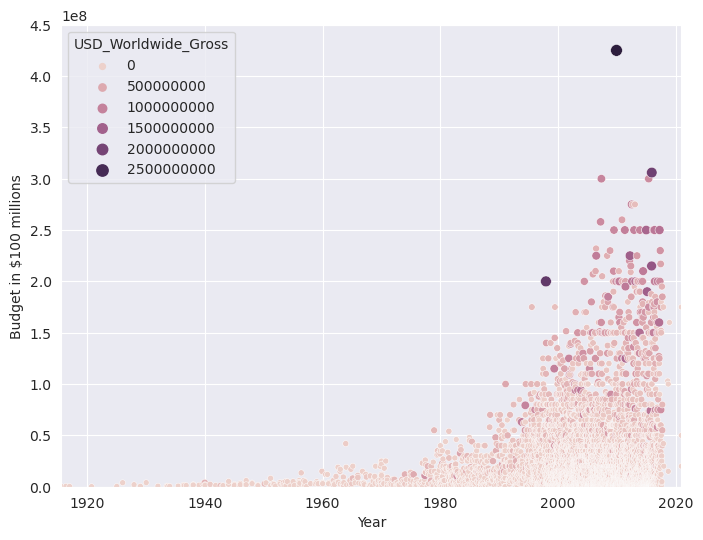

In [28]:
plt.figure(1,figsize=(8,6))
with sns.axes_style('darkgrid'):
    s_plt = sns.scatterplot(data = data, x="Release_Date",y="USD_Production_Budget",hue = "USD_Worldwide_Gross",size="USD_Worldwide_Gross")
    s_plt.set(ylim=(0, 450000000),xlim= (data.Release_Date.min(),data.Release_Date.max()), xlabel="Year",ylabel="Budget in $100 millions")


In [29]:
data_index = pd.DatetimeIndex(data.Release_Date)
year = data_index.year
decades = (10*(year//10))
data["Decade"] = decades
data_clean = data.drop(columns = ['Release_Date'])


data_clean

,Rank,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,Intolerance,385907,0,0,1910
2,5230,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,The Big Parade,245000,22000000,11000000,1920
...,...,...,...,...,...,...
5386,2950,Meg,15000000,0,0,2010
5387,126,Aquaman,160000000,0,0,2010
5388,96,Singularity,175000000,0,0,2020
5389,1119,Hannibal the Conqueror,50000000,0,0,2020


In [30]:

old_films = data_clean[data.Decade <=1960]
new_films = data_clean[data.Decade>1960]
old_films.describe()
print(len(old_films))
old_films.sort_values(by = "USD_Production_Budget",ascending = False).head()


153


,Rank,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
109,1253,Cleopatra,42000000,71000000,57000000,1960
150,2175,"Hello, Dolly",24000000,33208099,33208099,1960
143,2465,Sweet Charity,20000000,8000000,8000000,1960
118,2425,The Greatest Story Ever Told,20000000,15473333,15473333,1960
148,2375,Paint Your Wagon,20000000,31678778,31678778,1960


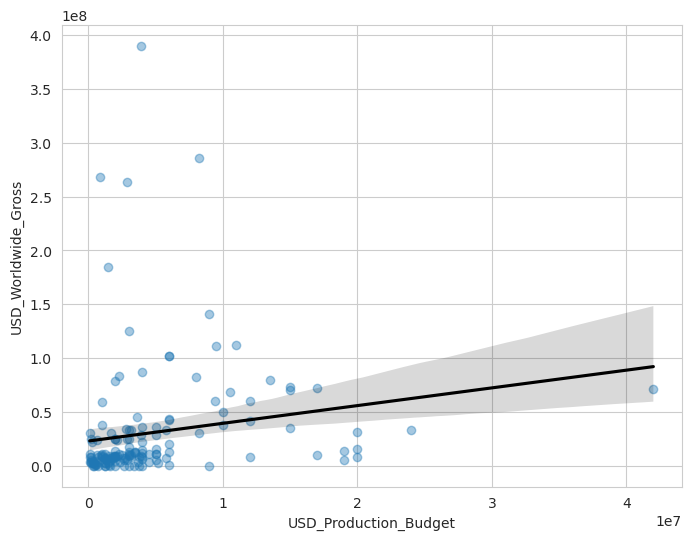

In [31]:
plt.figure(1,figsize=(8,6))
with sns.axes_style("whitegrid"):
    sns.regplot(x="USD_Production_Budget",y="USD_Worldwide_Gross",data=old_films,scatter_kws={'alpha':0.4},line_kws={'color':'black'})
    
    

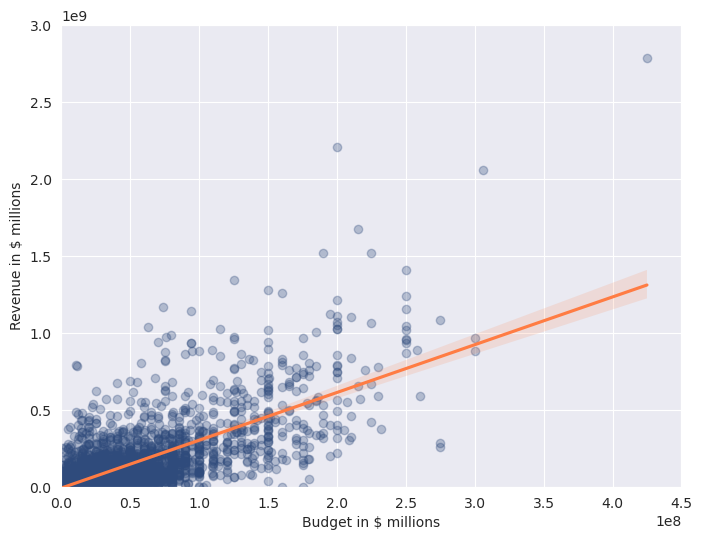

In [32]:
plt.figure(1,figsize=(8,6))
with sns.axes_style("darkgrid"):
    nf_plt = sns.regplot(data=new_films,x="USD_Production_Budget",y="USD_Worldwide_Gross",line_kws = {'color':'#ff7c43'},scatter_kws={'alpha':0.3},color='#2f4b7c')
    nf_plt.set(xlim=(0, 450000000),ylim=(0, 3000000000),xlabel="Budget in $ millions",ylabel="Revenue in $ millions")
    


In [33]:
regression = LinearRegression()
X = pd.DataFrame(new_films, columns = ['USD_Production_Budget'])
Y = pd.DataFrame(new_films,columns=['USD_Worldwide_Gross'])
regression.fit(X,Y)

print(regression.intercept_)
print(regression.coef_)
print(regression.score(X,Y))

[-8338272.43659501]
[[3.10151167]]
0.5529880674636849


In [36]:
a=pd.DataFrame(old_films,columns=['USD_Production_Budget'])
b=pd.DataFrame(old_films,columns=['USD_Worldwide_Gross'])
regression.fit(a,b)

print(regression.intercept_)
print(regression.coef_)
print(regression.score(a,b))


[22821538.63508038]
[[1.64771314]]
0.02937258620576877


In [39]:
#finding the revenue for 350 million budgetfilm
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0,0]*budget
revenue_estimate = round(revenue_estimate,6)
print(f"The estimated revenue for a $350 million is around${revenue_estimate:.10}")


The estimated revenue for a $350 million is around$599521139.0
